In [3]:
from src.texture_synthesis.feature_extractor import FeatureExtractor
from src.texture_synthesis.function import *
from src.texture_synthesis.gen import SlowGen, FastGen
import torch
from PIL import Image
import numpy as np
from src.texture_synthesis.adain_autoencoder import AdaINAutoencoder
from src.texture_synthesis.style_features_manipulation import *

In [4]:
device=torch.device("cuda" if (torch.cuda.is_available()) else 'cpu')

In [5]:
FE = FeatureExtractor().to(device)
AA = AdaINAutoencoder().to(device)

In [6]:
images1 = [Image.open(f"C:/Users/М-Видео/Desktop/grad work/code/test/rocks/{i}.jpg") for i in range(1, 11)]
images2 = [Image.open(f"C:/Users/М-Видео/Desktop/grad work/code/test/rocks_with_grass/{i}.jpg") for i in range(1, 11)]
target_image = load_from_url('https://sun9-60.userapi.com/s/v1/if2/wt5gwi4SW3fX5HrVkfItv26JBmXUso8PLbmb1yRK-a6ryx_MO9NFQYtB1ZAvDYmme2us2cN7y_fbKnvSnxrfvMjQ.jpg?size=941x941&quality=96&type=album')

style_tensor_set1 = [FE.get_style_representation(image_to_tensor(img.resize((256, 256)), False).to(device), K=1) for img in images1]
style_tensor_set2 = [FE.get_style_representation(image_to_tensor(img.resize((256, 256)), False).to(device), K=1) for img in images2]
t = FE.get_style_representation(image_to_tensor(target_image.resize((256, 256)), False).to(device), K=1)

In [7]:
d = style_attribute_extraction_svm(style_tensor_set1, style_tensor_set2, C=1)

In [8]:
FG = FastGen(FE, AA, device)

In [12]:
result = FG.run(t + d * 0.5, [200, 200], 1, 5)

Epoch: 0:  20%|██        | 1/5 [00:07<00:29,  7.49s/it]


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 2.00 GiB total capacity; 362.88 MiB already allocated; 1.06 MiB free; 434.00 MiB reserved in total by PyTorch)

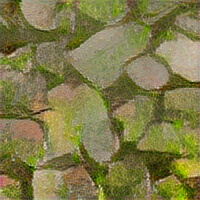

In [11]:
tensor_to_image(result, False)